The theory behind CNN:

The convolutional neural network uses a filter (or kernel) which scans across the image at hand and condenses it into a similarity score which is stored as a single bit in the output feature map. This output feature map is then pooled to extract the most, average, or least significant bits. The output feature maps from the previous operation are then compared against more filters in essence assigning a similarity score not just to one filter but a combination of filters compared against each other to identify more complex structures and shapes as well as structures of shapes in relation to each other, which makes it localized rather than globalized and can detect structures anywhere in an image. This is then fed into a dense neural network that will train on the certain shapes against a dataset and classify based on the combinations of output feature maps which basically just state if a structure exists in an image, onto a digit or class.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#Load data
(x_trainDigits, y_trainLabels), (x_testDigits, y_testLabels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
assert x_trainDigits.shape == (60000, 28, 28)
assert x_testDigits.shape == (10000, 28, 28)
assert y_trainLabels.shape == (60000,)
assert y_testLabels.shape == (10000,)
#Set the pixel values between 0 and 1, because the pixel values in the dataset are between 0 and 255
x_trainDigits, x_testDigits = x_trainDigits / 255.0, x_testDigits / 255.0
#if the dataset is small you can preprocess the image by augmenting them into many more

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_trainDigits, y_trainLabels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1330 - accuracy: 0.9590
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0466 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0122 - accuracy: 0.9961


In [5]:
test_loss, test_acc = model.evaluate(x_testDigits,  y_testLabels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.0474 - accuracy: 0.9859 - 3s/epoch - 9ms/step
0.9858999848365784


313/313 [==============================] - 2s 5ms/step
2


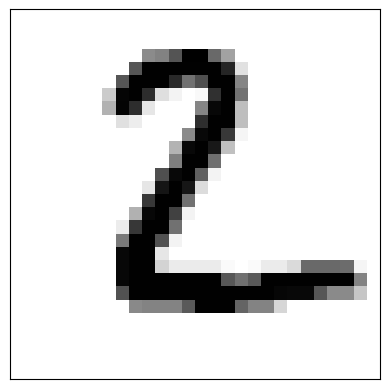

1


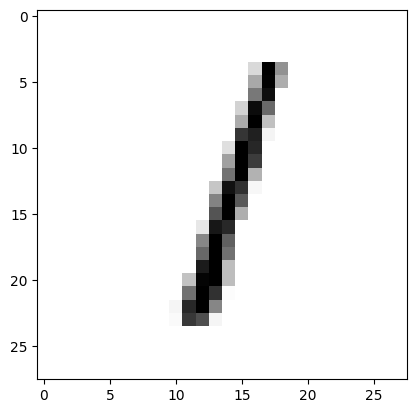

0


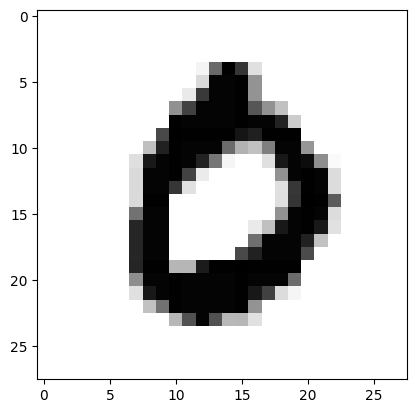

4


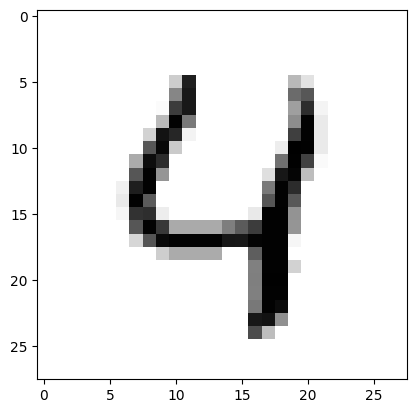

1


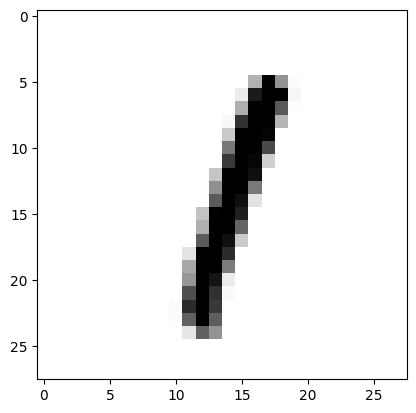

4


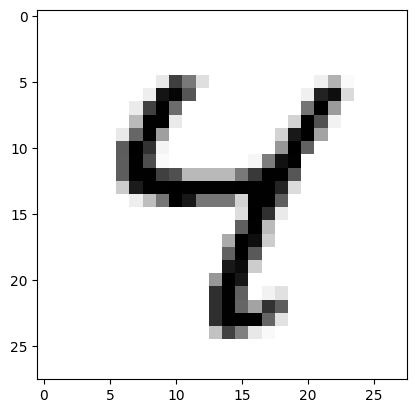

9


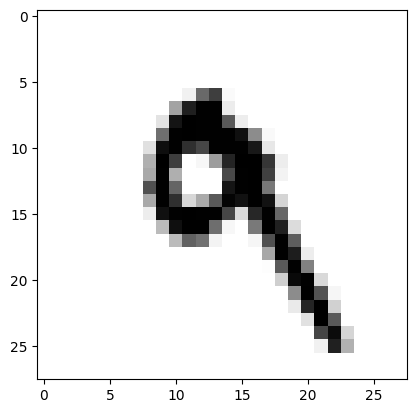

5


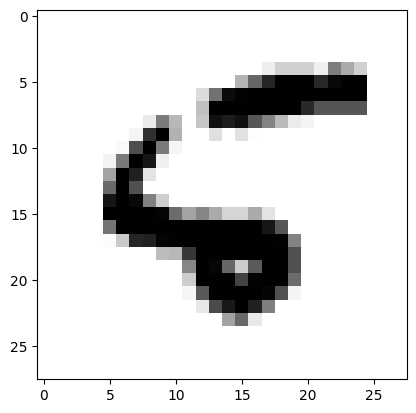

9


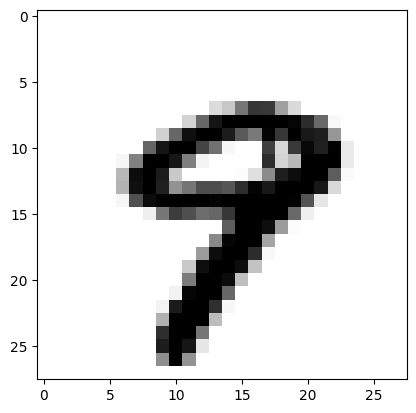

In [6]:
predictions = model.predict(x_testDigits)
a = plt.gca()
xax = a.axes.get_xaxis()
xax = xax.set_visible(False)
yax = a.axes.get_yaxis()
yax = yax.set_visible(False)
i = 1
while i < 10:
  print(np.argmax(predictions[i]))
  plt.imshow(x_testDigits[i] ,cmap=plt.cm.binary)
  plt.show()
  i += 1